In [1]:
# Gọi thư viện 
import numpy as np 
import cv2 
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Lấy đường dẫn đang làm việc hiện tại
print(os.getcwd())

/home/namanh/AI/HomeWork2


In [3]:
# Lấy đường dẫn folder chứa ảnh
folder_dir = "/home/namanh/DHBK_AI_ML_DL/Course/Day5/week2/data/image"

# In ra có bao nhiêu ảnh trong cat folder
print("Cat image: {} images".format(len(os.listdir(folder_dir))))

Cat image: 17 images


(168, 300, 3)


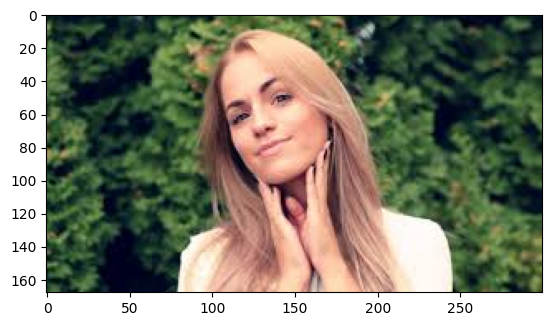

In [4]:
# Load ảnh
image = cv2.imread(os.path.join(folder_dir, "human3.jfif"))
# Chuyen BGR sang RGB dùng hàm cvtColor 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Lấy size ảnh
print(image.shape)
# Hiển thị ảnh
plt.imshow(image)

In [14]:
# Tạo 1 list chứa các data gồm 3 feature là red, green, blue 
image_px = []
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # Do đây là ảnh RGB nên ở mỗi ô sẽ có 3 giá trị màu là red, green, blue
        red, green, blue = image[i, j]
        # Chèn vào cuối list
        image_px.append([red, green, blue])
        
# Chuyển list sang dạng numpy array với loại của nó là float
image_px = np.array(image_px).astype(np.float32)
# In ra size của image_px
print(image_px.shape)
print(image_px)
# Bảng data pixel
table = pd.DataFrame(image_px, columns=["red","green","blue"])
# Hiển thị 10 samples trong table
table.head(10) 

50400
[[40. 60. 58.]
 [22. 42. 40.]
 [13. 33. 34.]
 ...
 [72. 92. 39.]
 [60. 78. 28.]
 [61. 79. 29.]]


,red,green,blue
0,40.0,60.0,58.0
1,22.0,42.0,40.0
2,13.0,33.0,34.0
3,22.0,42.0,43.0
4,28.0,47.0,53.0
5,22.0,41.0,47.0
6,16.0,34.0,44.0
7,16.0,34.0,44.0
8,9.0,27.0,41.0
9,5.0,23.0,37.0


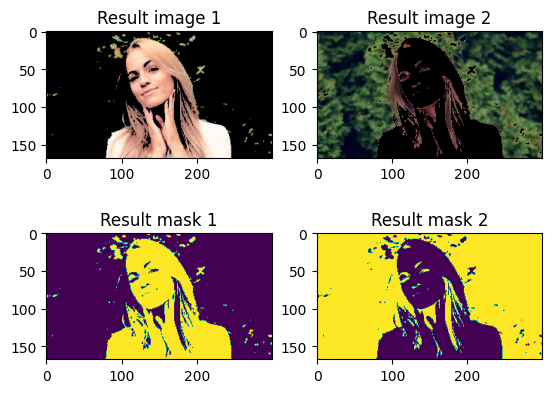

In [13]:
# Chúng ta sử dụng Kmeans để thử phân chia ảnh thành các vùng
# Ở đây chúng ta muốn lấy object ở trong ảnh chúng ta, ta có thể set n_clusters = 2 có nghĩa là 2 vùng: 1 vùng là pixel thuộc nền, 1 vùng là object
n_clusters = 2
# Gọi model với số cluster đã set bên trên và fit vào dữ liệu
kmean = KMeans(n_clusters=n_clusters).fit(image_px)
# Thực hiện predict: kết quả đầu ra là 1 ma trận chứa giá trị 0 và 1. 
clus = kmean.predict(image_px)

# Tạo một ma trận cùng size với ảnh gốc 
final_image = np.zeros((image.shape[0], image.shape[1], 1))


row = 0
col = 0
for pixel in clus:
    if col >= image.shape[1]:
        col = 0
        row += 1
    final_image[row][col] = pixel
    col += 1

final_image0 = np.where(final_image==0, 255, 0)
final_image1 = np.where(final_image==1, 255, 0)
# Chuyển sang dạng uint8 để có thể nhân ảnh
final_image0 = np.uint8(final_image0)
final_image1 = np.uint8(final_image1)
# Thực hiện phép toán and giữa image và final_mask
re0 = cv2.bitwise_and(image, image, mask=final_image0)
re1 = cv2.bitwise_and(image, image, mask=final_image1)
# Show ảnh kết quả
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.imshow(re0)
ax1.set_title("Result image 1")
ax2.imshow(re1)
ax2.set_title("Result image 2")
ax3.imshow(final_image0.reshape((image.shape[0],image.shape[1])))
ax3.set_title("Result mask 1")
ax4.imshow(final_image1.reshape((image.shape[0],image.shape[1])))
ax4.set_title("Result mask 2")
plt.show()
